Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

___
### **Integrantes:**
- Débora 
- Fernanda Vaz 
- Gabriel Cardoso
- Mayara Chew

___
### **Enunciado**

Neste mini-projeto, o objetivo é conectar esses conceitos a um problema real do ambiente bancário, construindo uma prova de conceito (PoC) baseada em dados.

O foco não é apenas o modelo, mas a capacidade de identificar um gap real e propor uma solução viável com ML.


**Desafio:**

Cada grupo deverá:

- Identificar um problema relevante do contexto bancário que possa ser endereçado com Machine Learning
- explicitar o gap existente
- apresentar uma solução baseada em dados.

___
### **1. O problema e o gap**

**Qual é o problema?**

Perda de clientes (churn), impactando em:
- Alto custo na aquisição de novos clientes
- Venda de produtos bancários (cross-sell)
- Lucro

___
**Qual decisão hoje é mal feita, lenta ou inexistente?**
- Ações de retenção são reativas, e não preventivas
- Campanhas são enviadas para todos os clientes, falta priorização de clientes com maior risco de saída (churn)
- Isso gera desperdício de recursos, e baixa eficiência em retenção

___
**Onde está o gap que justifica o uso de ML?**
- Previsão antecipada, agir preventivamente e com assertividade
- Relações nem sempre são lineares
- Interações entre variáveis são difíceis de identificar manualmente
- Não ficar refém da subjetividade da estratégia de cada agência. Montar uma estratégia unificada e assertiva.

___
### **2. Formulação do problema em ML**

**Classificação ou regressão?**

O problema apresentado é de classificação, pois precisamos classificar o cliente dada à sua probabilidade de dar churn (0 ou 1)

___
**Qual é a variável alvo?**

A variável alvo é a ``Exited``

___
**O que o modelo está tentando prever?**

Está tentando prever se o cliente irá sair do banco. (dar churn)

___

### **3. Análise dos dados**

**Breve análise exploratória**

___
**Correlação (uni e multivariada)**

___
**Missings e possíveis vieses**

___
### **4. Preparação dos dados**

**Normalização ou padronização**

___
**Tratamento de desbalanceamento (se aplicável)**

___
**Justificativa das escolhas**

___
### **5. Modelagem**


**Pelo menos 2 modelos entre:**
- Regressão logística
- Árvore de decisão
- Random Forest

É permitido (mas não obrigatório) utilizar outras técnicas não vistas em aula, desde que:
- Sejam explicadas
- Façam sentido para o problema

___
### **6. Avaliação**

- Métrica adequada ao problema (accuracy, recall, precision, AUC, etc.)
- Comparação entre modelos
- Trade-offs relevantes (ex.: falso positivo vs falso negativo)

___
### **7. Conclusão executiva**

**O modelo resolve o gap identificado?**

___
**Onde ele falha?**

___
**O que seria necessário para levar isso para produção?**

___
**Há potencial de geração de valor (ex.: redução de custo, aumento de eficiência, mitigação de risco)?**

**Caso positivo, explore os resultados sob uma ótica qualitativa ou estimada, considerando impacto financeiro, ROI ou payback.**

___
### 8. Riscos e limitações

**Riscos técnicos**

___
**Riscos de viés**

___
**Riscos regulatórios ou operacionais**

___
### **9. Apresentação do PoC**

**Demonstração da solução concebida em funcionamento, preferencialmente como:**

- Uma aplicação completa (ex.: Streamlit), e/ou

- Um notebook ou programa em Python executável via linha de comando.

___

**Visão geral do Dataset**

In [23]:
import pandas as pd
pd.set_option('display.max_columns', None) # Exibe todas as colunas do dataframe
pd.set_option('display.max_rows', None)    # Exibe todas as linhas do dataframe
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import math
import numpy as np
import pingouin as pg
from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [24]:
try:
    df_raw = pd.read_csv("Customer-Churn-Records.csv")
except:
    path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")
    df_raw = pd.read_csv(f"{path}/Customer-Churn-Records.csv")

print(df_raw.shape)
df_raw.head()

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [25]:
df_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


___
### **3 - Análise dos Dados**

**Análises:**
- Matriz de correlação
- Boxplot
- Odds Ratio

**Tratamento de variáveis:**
- Dar atenção às variáveis demográficas (gênero, idade, país de origem) -> Podem implicar discriminação
- Tratamento dos nulos
- Dummyzação das variáveis categóricas (Card Type)
- Relação das variáveis ``IsActiveMember`` e ``Complain`` com a ``Exited``. Seria uma forma de vazamento de dados?

___
#### **3.1 - Breve Análise Exploratória**

**Eliminando colunas irrelevantes**

In [26]:
df = df_raw.copy()

print(df.shape)
display(df.head())

# Eliminando colunas irrelevantes
cols_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=cols_drop)

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**Verificando distribuição de categorias**

Insights:
- Desbalanceamento no churn (80/20)
- Card Type e Geography parecidos (dados sintéticos?)

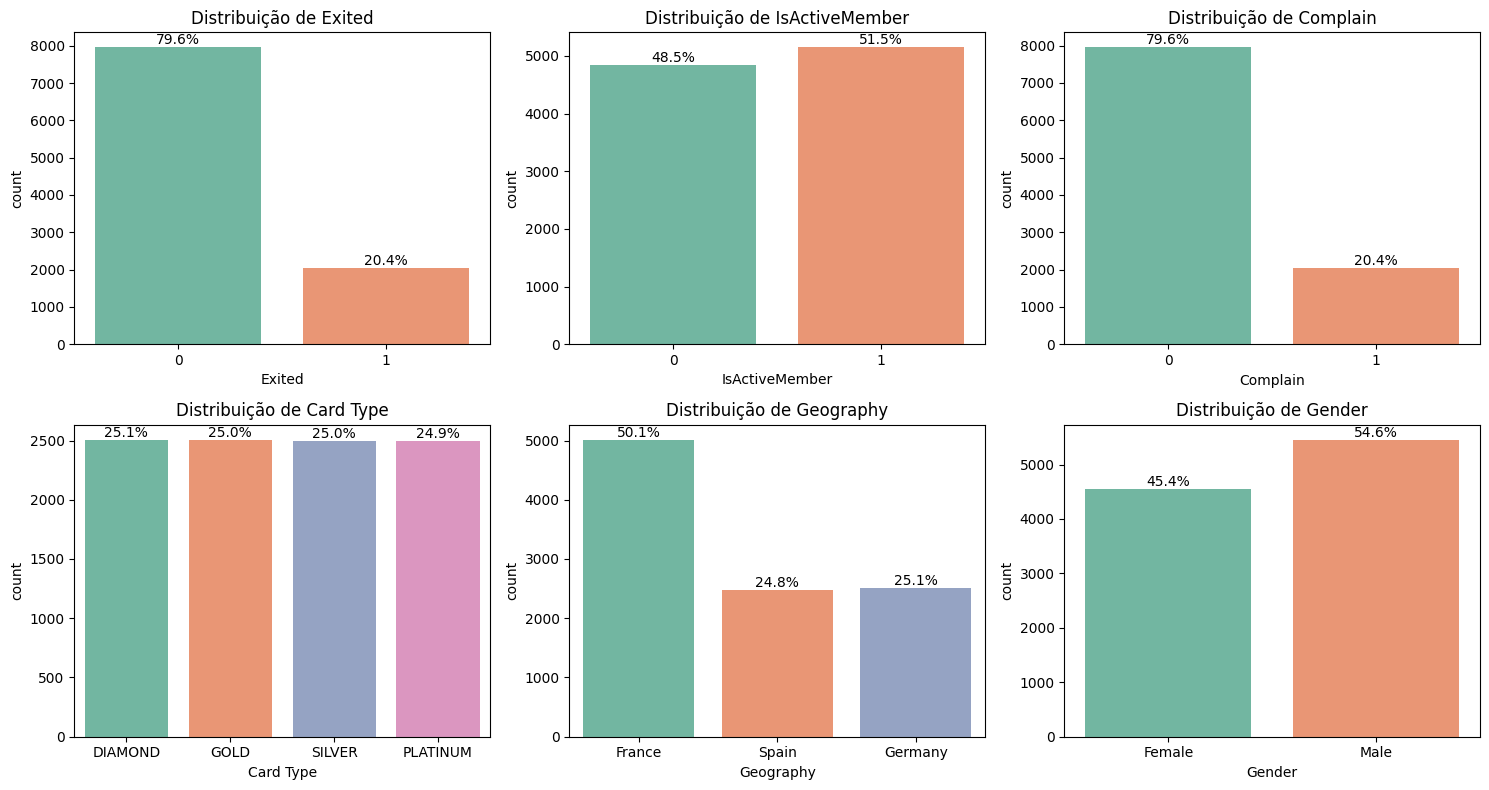

In [27]:
cols_cat = ['Exited', 'IsActiveMember', 'Complain', 'Card Type', 'Geography', 'Gender']
linhas = math.ceil(len(cols_cat) / 3)

plt.figure(figsize=(15, 4 * linhas))

for i, col in enumerate(cols_cat):
    plt.subplot(linhas, 3, i + 1)
    ax = sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f"Distribuição de {col}") # Adiciona o título
    
    # Adiciona a porcentagem acima de cada barra
    for c in ax.containers:
        labels = [f'{val / len(df):.1%}' for val in c.datavalues]
        ax.bar_label(c, labels=labels)

plt.tight_layout()
plt.show()

**Distribuição das categorias por Churn**
- Mulheres dão mais churn proporcionalmente do que homens
- Alemães dão mais churn proporcionalmente
- Clientes DIAMOND dão um pouco mais de churn

**OBS: SOMA DAS BARRAS = 100%**

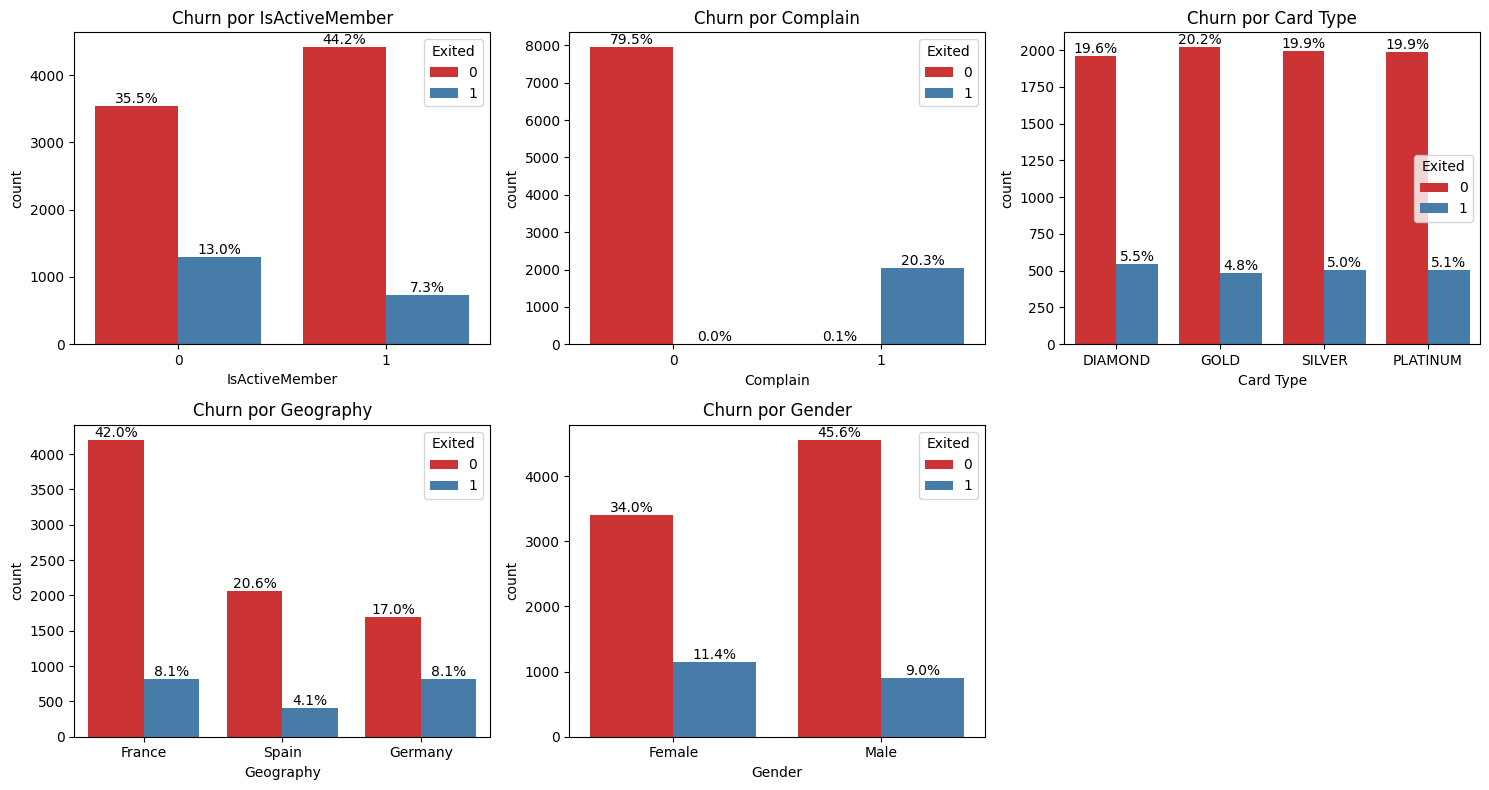

In [28]:
cols_cat = ['IsActiveMember', 'Complain', 'Card Type', 'Geography', 'Gender']
linhas = math.ceil(len(cols_cat) / 3)

plt.figure(figsize=(15, 4 * linhas))

for i, col in enumerate(cols_cat):
    ax = plt.subplot(linhas, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Exited', palette='Set1', ax=ax)
    plt.title(f"Churn por {col}")
    
    # Adiciona a porcentagem
    for c in ax.containers:
        labels = [f'{val / len(df):.1%}' for val in c.datavalues]
        ax.bar_label(c, labels=labels)

plt.tight_layout()
plt.show()

**Pairplot**

Insights:
- Fazer análise direcionada a clientes de alto valor usando o balance e o quartil 0.75.


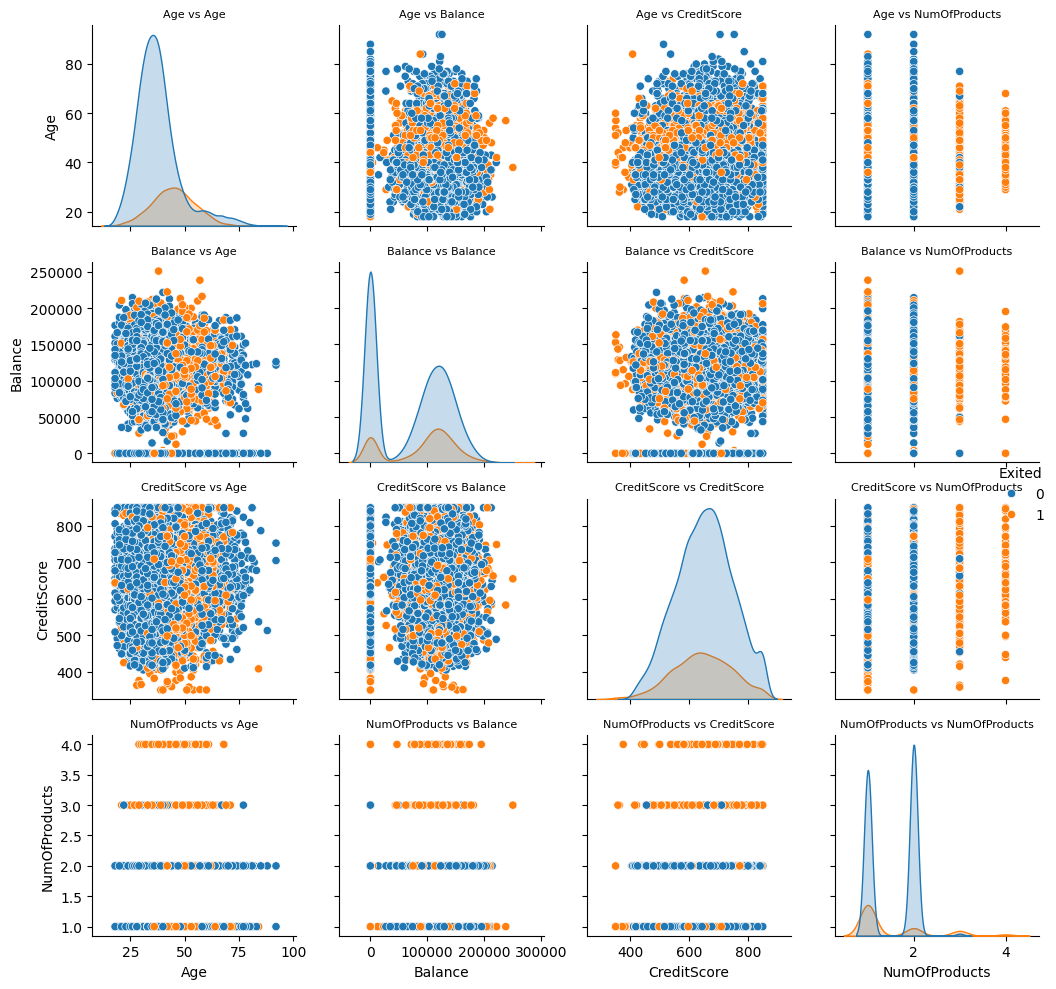

In [29]:
g = sns.pairplot(
    df[["Age", "Balance", "CreditScore", "NumOfProducts", "Exited"]],
    hue="Exited"
)

# Itera sobre as variáveis de Y (linhas) e X (colunas) para nomear cada plot
for i, y_var in enumerate(g.y_vars):
    for j, x_var in enumerate(g.x_vars):
        g.axes[i, j].set_title(f"{y_var} vs {x_var}", fontsize=8)

plt.tight_layout()
plt.show()

**Kernel Density Estimation (KDE)**

Insights:
- Diferenças em ``Age``, ``Balance`` e ``NumOfProducts``

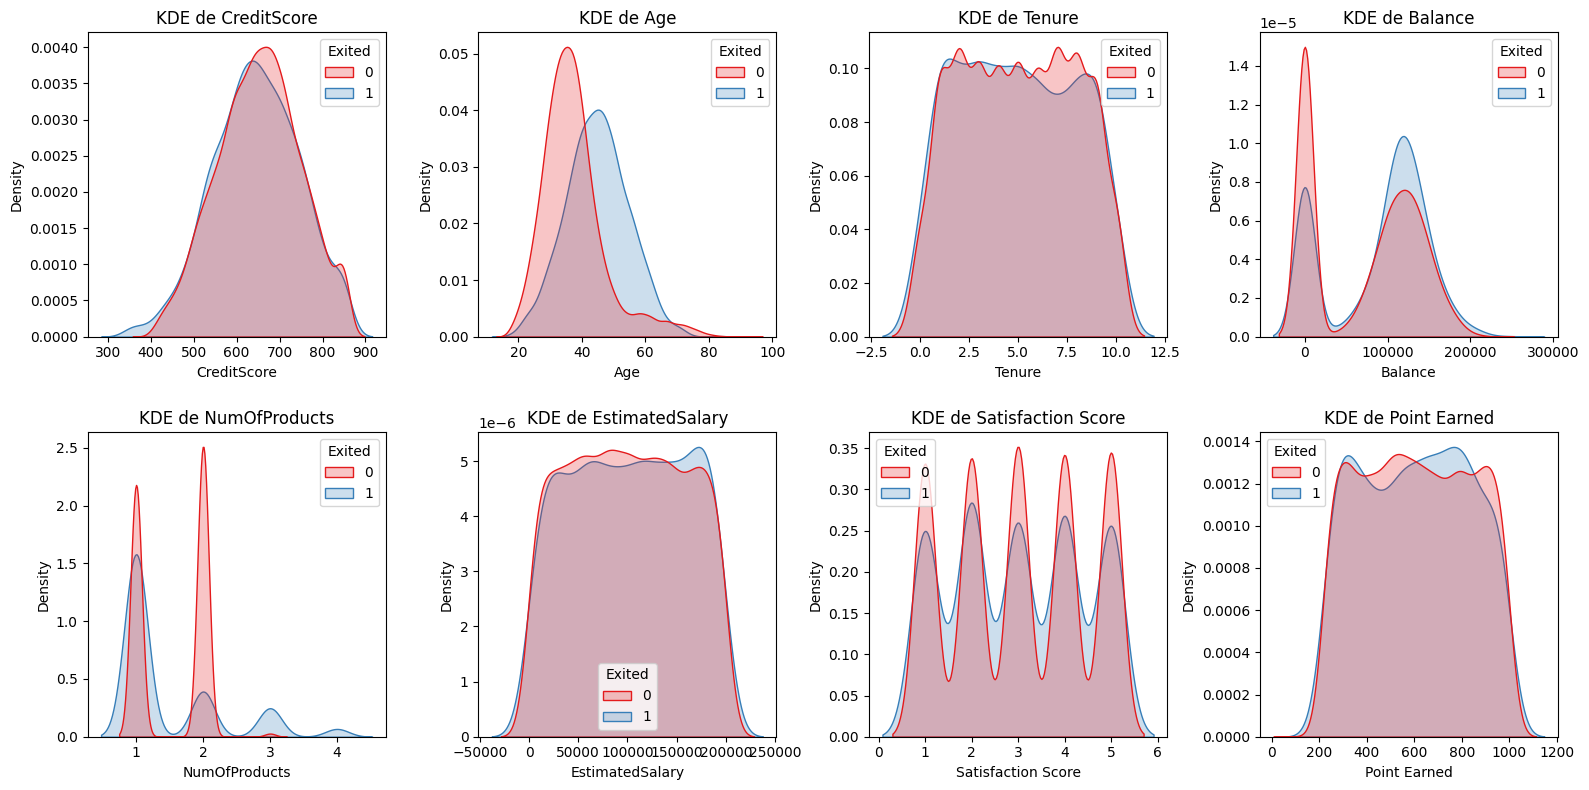

In [30]:
# Filtra colunas numéricas que tenham mais de 2 valores (não binárias) e que não sejam o target
num_cols = [c for c in df.select_dtypes(include='number').columns if df[c].nunique() > 2 and c != 'Exited']
linhas = math.ceil(len(num_cols) / 4)

plt.figure(figsize=(16, 4 * linhas))

for i, col in enumerate(num_cols):
    plt.subplot(linhas, 4, i + 1)
    # common_norm=False garante que as curvas sejam comparáveis mesmo se os grupos tiverem tamanhos diferentes
    sns.kdeplot(data=df, x=col, hue='Exited', fill=True, common_norm=False, palette='Set1')
    plt.title(f"KDE de {col}")

plt.tight_layout()
plt.show()

**Boxplot de variáveis para Churn/Não Churn**

Insights:
- Diferença notável nas distribuições de ``Age`` e ``Balance``

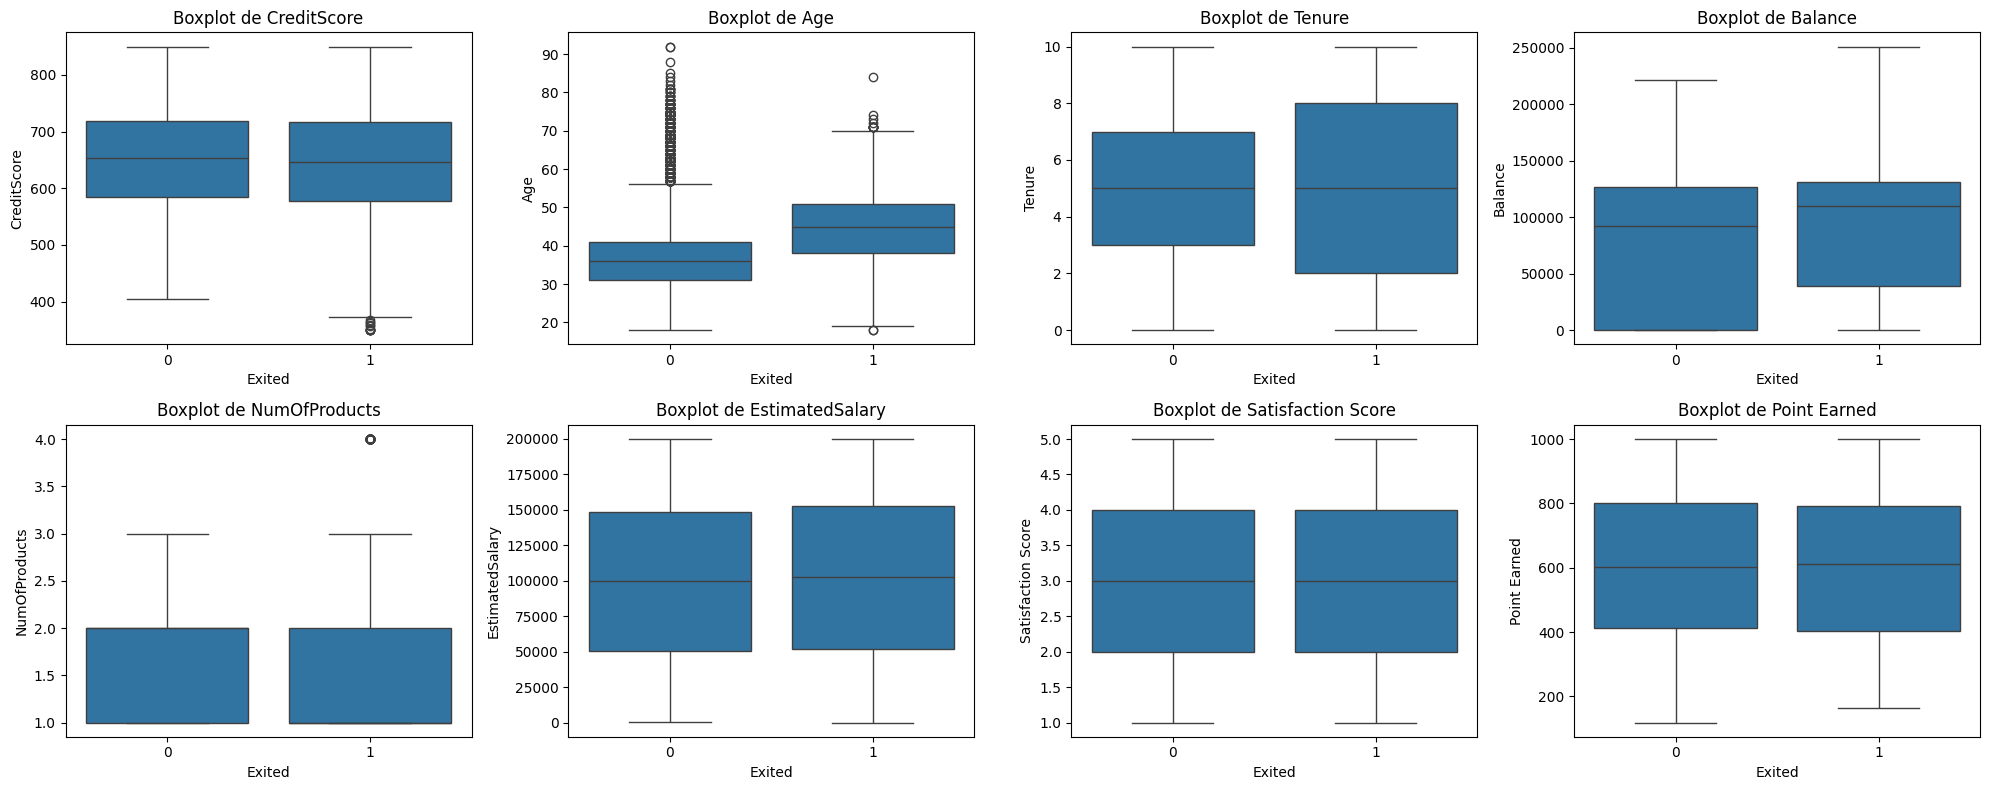

In [31]:
import math

col_target = ['Exited']
boxplot_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

n_cols = 4
n_rows = math.ceil(len(boxplot_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(boxplot_cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Oculta eixos extras caso o número de colunas não seja múltiplo de 4
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Insights Finais:**
- Verificar se os valores ``Gender=Female``, ``Card_Type=Platinum``, ``Age``, ``Balance``, ``NumOfProducts`` e ``Geography=Germany`` podem contribuir à previsão de Churn

___
#### **3.2 - Correlação uni e multivariada**

**Dummyzação das variáveis**

In [32]:
# Dummyzar variáveis categóricas para viabilizar análise de correlação
cols_cat = ['Card Type', 'Geography', 'Gender']
df_dummies = pd.get_dummies(df, columns=cols_cat, drop_first=True, dtype=int)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,1,0,0,0,1,0


**Matriz de Correlação**

Insights:
- Grande maioria possui correlação nula
- Investigar relação de ``age`` e ``balance`` com ``Exited``

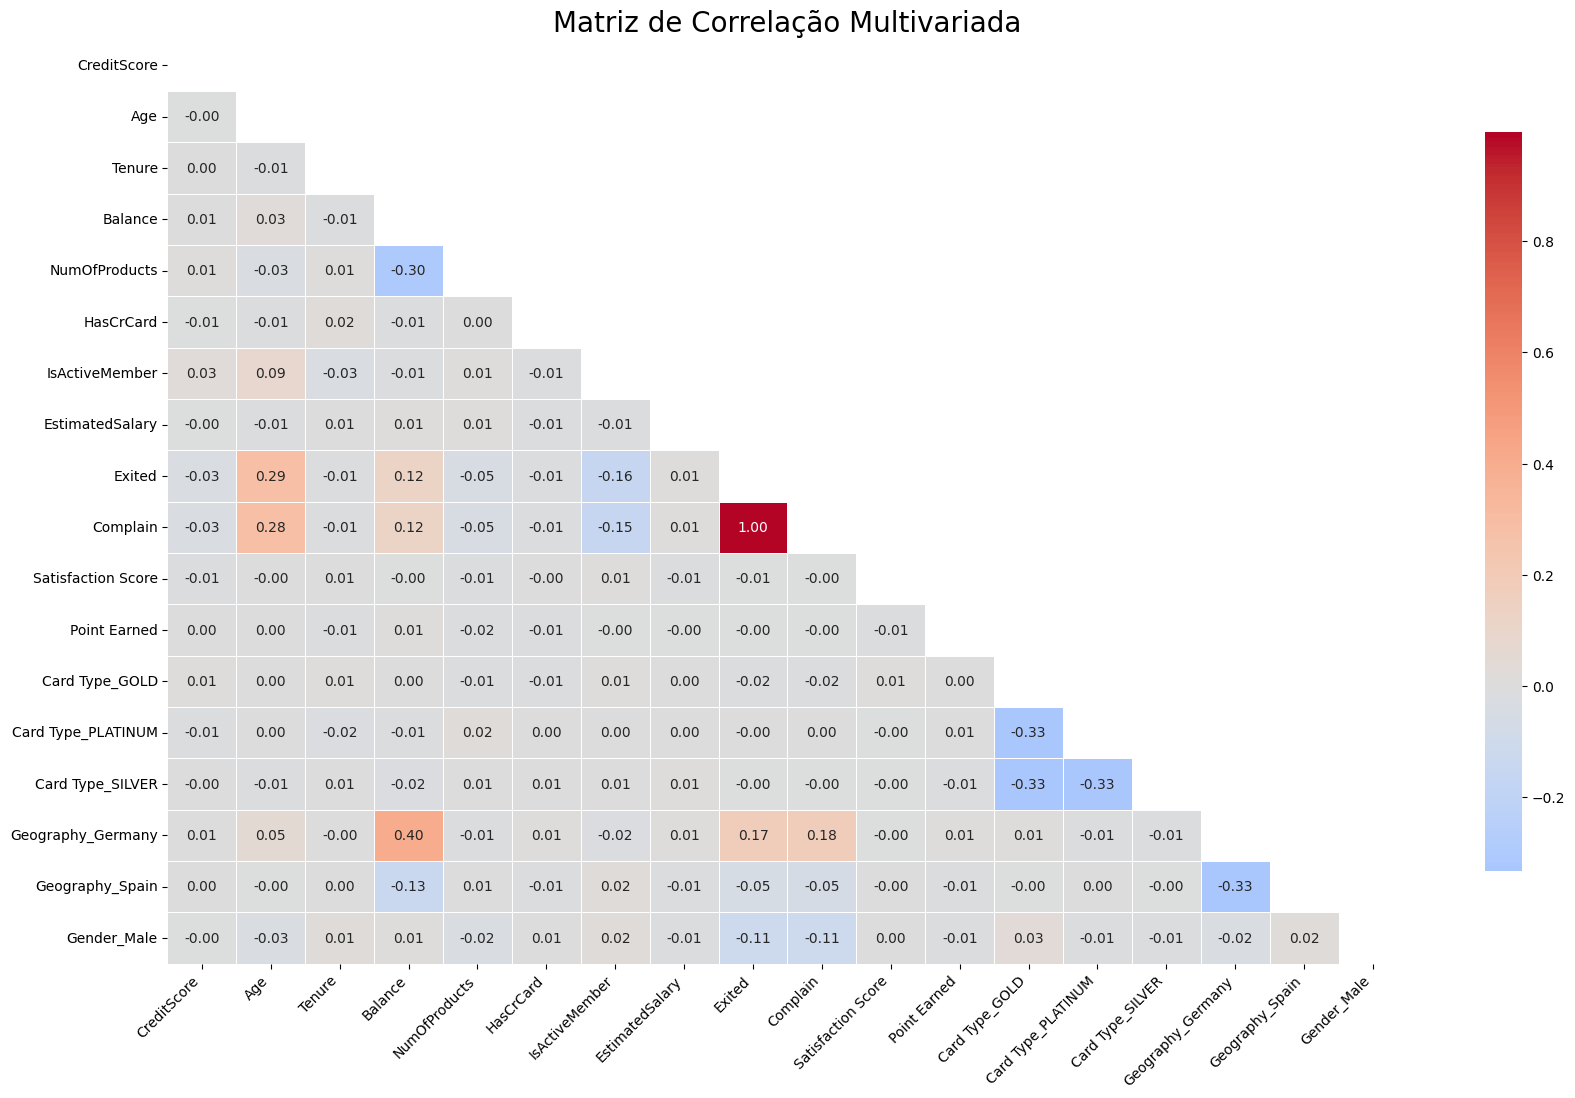

In [33]:
corr = df_dummies.corr()

# 2. Configurar o tamanho do gráfico (Largura x Altura)
# 20 para a largura e 12 para a altura costuma ser ideal para ~20 variáveis
plt.figure(figsize=(20, 12))

# 3. Criar uma máscara para esconder a metade superior (Opcional, mas ajuda muito na leitura)
# Como a correlação de A com B é a mesma de B com A, o gráfico fica mais limpo.
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Plotar o Heatmap
sns.heatmap(
    corr, 
    mask=mask,              # Aplica a máscara (opcional, comente se preferir o quadrado cheio)
    annot=True,             # Mostra os valores de correlação
    fmt=".2f",              # Arredonda para 2 casas decimais
    cmap='coolwarm',        # Escala de Azul (negativo) para Vermelho (positivo)
    center=0,               # Garante que o branco seja o ponto neutro (zero)
    linewidths=.5,          # Adiciona uma linha fina entre os quadrados
    cbar_kws={"shrink": .8} # Ajusta o tamanho da barra de legenda lateral
)

# 5. Ajustes estéticos finais
plt.title('Matriz de Correlação Multivariada', fontsize=20)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes das colunas para não embolar
plt.show()

**Correlação - Pearson e Spearman**

In [34]:
pearson_corr = df_dummies.corr(method='pearson', numeric_only=True)
spearman_corr = df_dummies.corr(method='spearman', numeric_only=True)

corr = pd.DataFrame({
    "Pearson": pearson_corr["Exited"],
    "Spearman": spearman_corr["Exited"]
}).sort_values(by="Pearson", ascending=False)

corr

,Pearson,Spearman
Exited,1.000000,1.000000
Complain,0.995693,0.995693
Age,0.285296,0.324012
Geography_Germany,0.173313,0.173313
Balance,0.118577,0.111069
EstimatedSalary,0.012490,0.012472
Card Type_PLATINUM,-0.000276,-0.000276
Card Type_SILVER,-0.003834,-0.003834
Point Earned,-0.004628,-0.004406
Satisfaction Score,-0.005849,-0.005905


**Correlação Parcial**

In [35]:
target = "Exited"

# Pega todas as colunas do df_dummies, exceto o target
cols_to_use = [c for c in df_dummies.columns if c != target]

partial_corr_results = []

for col in cols_to_use:
    # As covariáveis são todas as outras colunas numéricas, exceto a atual
    covar_cols = [c for c in cols_to_use if c != col]
    
    # Calcula Pearson e Spearman usando df_dummies
    pc_pearson = pg.partial_corr(data=df_dummies, x=col, y=target, covar=covar_cols, method="pearson")
    pc_spearman = pg.partial_corr(data=df_dummies, x=col, y=target, covar=covar_cols, method="spearman")
    
    # Salva os resultados
    partial_corr_results.append((
        col, 
        pc_pearson["r"].values[0], 
        pc_spearman["r"].values[0]
    ))

# Cria o DataFrame final e ordena pela coluna Pearson de forma descendente
partial_corr_df = pd.DataFrame(partial_corr_results, columns=["Feature", "Pearson", "Spearman"])
partial_corr_df = partial_corr_df.sort_values(by="Pearson", ascending=False).reset_index(drop=True)

partial_corr_df

,Feature,Pearson,Spearman
0,Complain,0.994943,0.994789
1,Age,0.037192,0.038581
2,Card Type_SILVER,0.003673,0.003645
3,Geography_Spain,0.002277,0.002095
4,CreditScore,0.002267,0.003555
5,HasCrCard,0.001065,0.001212
6,EstimatedSalary,0.000833,0.000807
7,Balance,0.000156,-0.003111
8,Card Type_GOLD,-0.004173,-0.004053
9,Gender_Male,-0.005223,-0.005396


___
#### **3.3 - Missings e possíveis vieses**

- Não existem valores faltantes
- Correlação quase perfeita entre ``Complain`` e ``Exited``
- Dúvida no ``IsActiveMember``: um cliente é ativo e deu churn ao mesmo tempo?

Nulos

In [36]:
display(df_dummies.isnull().sum())

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
Card Type_GOLD        0
Card Type_PLATINUM    0
Card Type_SILVER      0
Geography_Germany     0
Geography_Spain       0
Gender_Male           0
dtype: int64

Qual o sentido de um cliente ser ativo e churn ao mesmo tempo?

In [37]:
df_dummies[(df_dummies['IsActiveMember'] == 1) & (df_dummies['Exited'] == 1)].head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
46,829,27,9,112045.67,1,1,1,119708.21,1,1,3,779,0,0,0,1,0,0
47,637,39,9,137843.80,1,1,1,117622.80,1,1,1,730,0,0,1,1,0,0
90,647,44,5,0.00,3,1,1,174205.22,1,1,3,752,0,0,0,0,1,0
104,670,65,1,0.00,1,1,1,177655.68,1,1,2,915,1,0,0,0,1,0


Quase todos os complains são churn.

In [38]:
pd.crosstab(df['Exited'], df['Complain'])


Complain,0,1
Exited,,
0,7952,10
1,4,2034


In [39]:
cols_remove = ['Complain', 'IsActiveMember']
df_model = df_dummies.drop(cols_remove, axis=1)

**Decisão final:**
- Remover as variáveis ``Complain`` e ``IsActiveMember`` do treinamento do modelo 


___
## **4. Preparação dos dados**

___
### **4.1 - Normalização ou padronização**

- Aplicada após holdout para evitar vazamento de dados (normalização)

___
### **4.2 - Tratamento de desbalanceamento (se aplicável)**

- Utilização de class-weight nos modelos. Não foi implementada técnica de oversampling

___
### **4.3 - Justificativa das escolhas**
- **StandardScaler:** Colocar todas as features na mesma escala, conseguir comparar ``Age``, ``Balance`` e ``Satisfaction Score`` de maneira direta. Facilita para o modelo entender a importância de cada variável.

- **Class-weight:** Foi optado por aplicar peso nas classes. A utilização de uma técnica de oversampling (SMOTE) implicaria na criação de muitos dados sintéticos, que direcionam o treinamento com dados que não existem na realidade

- **Aplicação após holdout:** Caso fosse aplicado antes, a escala seria distorcida com base nos dados de teste. Assim como os dados sintéticos do SMOTE também teriam influencia dos dados de teste. A aplicação após o holdout é para evitar vazamento de dados.


___
## **5. Modelagem**

**Regressão Logística e Odds Ratio**

In [40]:
import pandas as pd
import numpy as np


df_relog = df_model.copy()

X = df_relog.drop(columns=['Exited'])
y = df_relog['Exited']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinamento
modelo_log = LogisticRegression()
modelo_log.fit(X_scaled, y)

# Extraindo métricas
coeficientes = modelo_log.coef_[0]
odds_ratios = np.exp(coeficientes)

# Montando o DataFrame
tabela_resultados = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': coeficientes,
    'Odds Ratio': odds_ratios
})

# Adicionando o Coeficiente Absoluto usando a função abs()
tabela_resultados['Coeficiente Absoluto'] = tabela_resultados['Coeficiente'].abs()
tabela_resultados = tabela_resultados[['Variável', 'Odds Ratio', 'Coeficiente', 'Coeficiente Absoluto']]
tabela_resultados = tabela_resultados.sort_values(by='Odds Ratio', ascending=False).reset_index(drop=True)

print(tabela_resultados)

              Variável  Odds Ratio  Coeficiente  Coeficiente Absoluto
0                  Age    1.946382     0.665972              0.665972
1    Geography_Germany    1.399224     0.335918              0.335918
2              Balance    1.173340     0.159855              0.159855
3      EstimatedSalary    1.035845     0.035218              0.035218
4      Geography_Spain    1.008793     0.008754              0.008754
5            HasCrCard    0.988637    -0.011428              0.011428
6   Satisfaction Score    0.982651    -0.017501              0.017501
7     Card Type_SILVER    0.975572    -0.024731              0.024731
8         Point Earned    0.973169    -0.027197              0.027197
9               Tenure    0.972998    -0.027373              0.027373
10  Card Type_PLATINUM    0.967038    -0.033518              0.033518
11      Card Type_GOLD    0.936207    -0.065918              0.065918
12       NumOfProducts    0.934494    -0.067750              0.067750
13         CreditSco

**Implementação de treinamento**

In [41]:
def encontrar_melhor_modelo(X_train, y_train, X_test, y_test):
    """
    Roda um RandomizedSearchCV para 4 modelos usando StandardScaler e SMOTE,
    avalia todos no conjunto de teste para comparação, plota as matrizes de confusão
    e retorna o melhor modelo treinado.
    """
    print("Iniciando a busca pelo melhor modelo...\n")

    # 1. Definindo os modelos base
    base_tree = DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=42)
    
    # 2. Dicionário com modelos e seus parâmetros
    modelos_params = {
        "Regressão Logística": (
            LogisticRegression(class_weight="balanced", max_iter=4000, random_state=42),
            {
                "model__C": loguniform(1e-3, 1e3),
                "model__solver": ["lbfgs", "liblinear", "newton-cg", "sag", "saga"],
                "model__penalty": ["l2"]
            }
        ),
        "Random Forest": (
            RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1),
            {
                "model__n_estimators": randint(10, 500),
                "model__max_depth": randint(1, 100),
                "model__min_samples_split": randint(2, 60),
                "model__min_samples_leaf": randint(1, 30),
                "model__max_features": ["sqrt", "log2", None],
                "model__bootstrap": [True, False]
            }
        ),
        "AdaBoost": (
            AdaBoostClassifier(estimator=base_tree, random_state=42),
            {
                "model__n_estimators": [100, 200, 400, 600],
                "model__learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5]
            }
        ),
        "SVM": (
            SVC(class_weight="balanced", random_state=42),
            {
                "model__kernel": ["linear", "poly", "rbf"],
                "model__C": loguniform(1e-3, 1e3),
                "model__gamma": ["scale", "auto"]
            }
        )
    }

    melhor_f1_global = 0
    melhor_modelo_global = None
    nome_melhor_modelo = ""
    
    # Dicionário para armazenar as matrizes de confusão de cada modelo
    resultados_teste = {}

    # 3. Loop para testar cada modelo
    for nome, (modelo, params) in modelos_params.items():
        print(f"--- Treinando {nome} ---")

        # Construindo a esteira de pré-processamento (Scaler -> Modelo)
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", modelo)
        ])

        # Configurando a busca aleatória
        random_search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=params,
            n_iter=10,        # Quantidade de combinações testadas por modelo
            scoring="f1",     # Focando no F1-Score devido ao desbalanceamento
            cv=3,             # Divisões da validação cruzada (pode aumentar para 5)
            random_state=42,
            n_jobs=-1,
            refit=True        # Já devolve o modelo retreinado com os melhores parâmetros
        )

        # Rodando o treinamento
        random_search.fit(X_train, y_train)
        f1_atual = random_search.best_score_
        
        print(f"Melhor F1 na Validação Cruzada ({nome}): {f1_atual:.4f}")
        print(f"Melhores parâmetros: {random_search.best_params_}\n")

        # Avaliando o modelo atual nos dados de teste para salvar a Matriz de Confusão
        modelo_treinado = random_search.best_estimator_
        y_pred = modelo_treinado.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Salvando os resultados para plotar e printar depois
        resultados_teste[nome] = cm

        # Atualizando o campeão global (Baseado no F1 da Validação Cruzada)
        if f1_atual > melhor_f1_global:
            melhor_f1_global = f1_atual
            melhor_modelo_global = modelo_treinado
            nome_melhor_modelo = nome

    # 4. Plotando as Matrizes de Confusão Lado a Lado (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Comparação das Matrizes de Confusão (Dados de Teste)', fontsize=16)
    axes = axes.flatten()

    for idx, (nome, cm) in enumerate(resultados_teste.items()):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0 (Ficou)", "1 (Churn)"])
        disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
        axes[idx].set_title(f"Modelo: {nome}")

    plt.tight_layout()
    plt.show()

    # 5. Printando os valores da Matriz de Confusão de forma seguida
    print("="*50)
    print(" COMPARAÇÃO DETALHADA DAS MATRIZES DE CONFUSÃO")
    print("="*50)
    for nome, cm in resultados_teste.items():
        print(f"\n--- {nome} ---")
        print(f"Verdadeiros Negativos (Classe 0 - Ficou e Previu que Ficaria): {cm[0][0]}")
        print(f"Falsos Positivos      (Classe 0 - Ficou, mas Previu Churn)   : {cm[0][1]}")
        print(f"Falsos Negativos      (Classe 1 - Deu Churn, previu Ficou)   : {cm[1][0]}")
        print(f"Verdadeiros Positivos (Classe 1 - Deu Churn e Previu Churn)  : {cm[1][1]}")

    # 6. Resultado final do Vencedor
    print("\n" + "="*50)
    print(f"🏆 O GRANDE CAMPEÃO FOI: {nome_melhor_modelo}")
    print(f"F1-Score na Validação Cruzada: {melhor_f1_global:.4f}")
    print("="*50)

    return melhor_modelo_global

___
## **6. Avaliação**

- Métrica adequada ao problema (accuracy, recall, precision, AUC, etc.)
- Comparação entre modelos
- Trade-offs relevantes (ex.: falso positivo vs falso negativo)

**Treinando e avaliação do modelo**

Iniciando a busca pelo melhor modelo...

--- Treinando Regressão Logística ---
Melhor F1 na Validação Cruzada (Regressão Logística): 0.4831
Melhores parâmetros: {'model__C': 0.008629132190071854, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}

--- Treinando Random Forest ---
Melhor F1 na Validação Cruzada (Random Forest): 0.5976
Melhores parâmetros: {'model__bootstrap': True, 'model__max_depth': 22, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 25, 'model__n_estimators': 423}

--- Treinando AdaBoost ---


C:\Users\gbrls\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Melhor F1 na Validação Cruzada (AdaBoost): 0.5746
Melhores parâmetros: {'model__n_estimators': 200, 'model__learning_rate': 0.05}

--- Treinando SVM ---
Melhor F1 na Validação Cruzada (SVM): 0.5495
Melhores parâmetros: {'model__C': 0.1767016940294795, 'model__gamma': 'scale', 'model__kernel': 'rbf'}



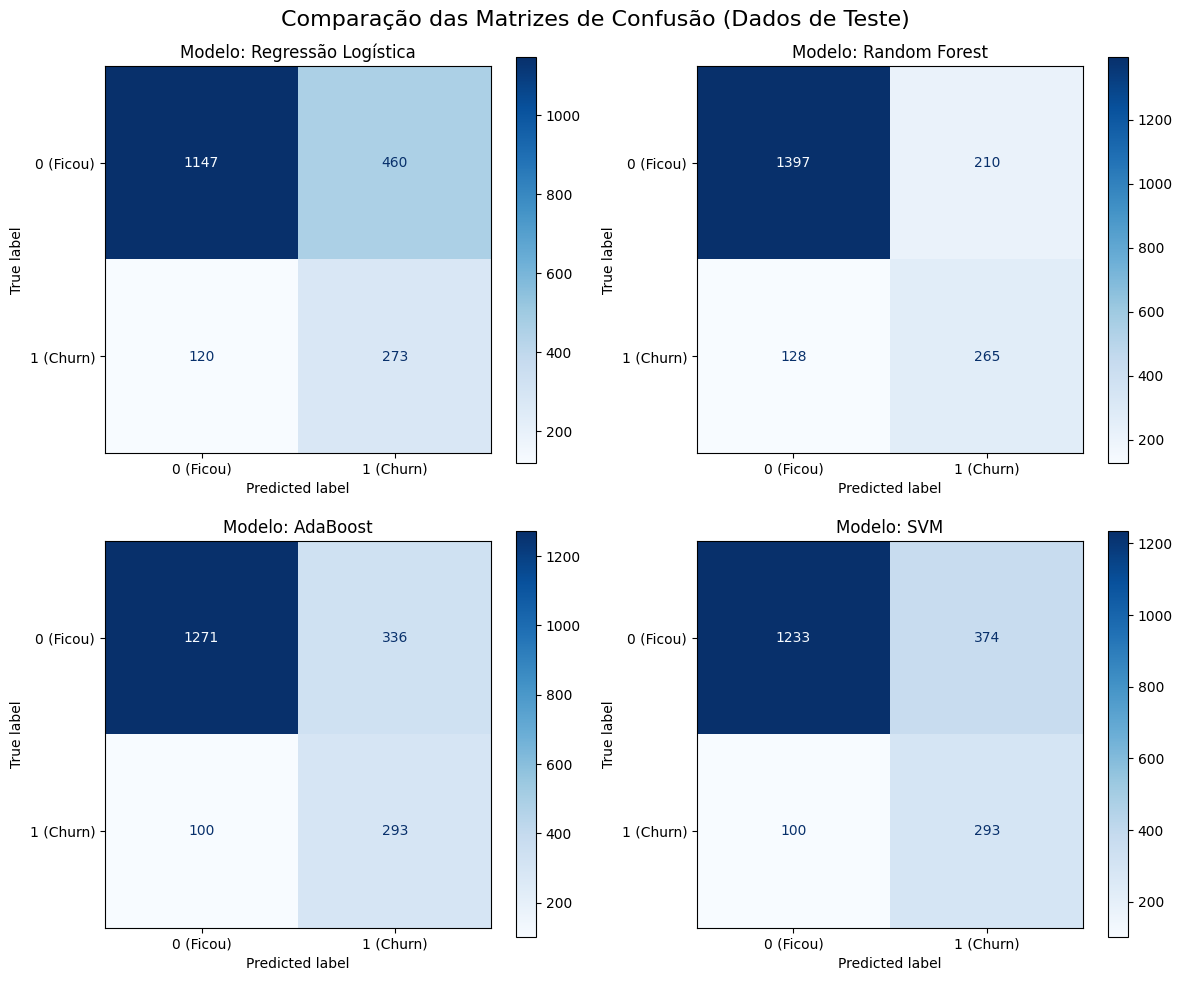

 COMPARAÇÃO DETALHADA DAS MATRIZES DE CONFUSÃO

--- Regressão Logística ---
Verdadeiros Negativos (Classe 0 - Ficou e Previu que Ficaria): 1147
Falsos Positivos      (Classe 0 - Ficou, mas Previu Churn)   : 460
Falsos Negativos      (Classe 1 - Deu Churn, previu Ficou)   : 120
Verdadeiros Positivos (Classe 1 - Deu Churn e Previu Churn)  : 273

--- Random Forest ---
Verdadeiros Negativos (Classe 0 - Ficou e Previu que Ficaria): 1397
Falsos Positivos      (Classe 0 - Ficou, mas Previu Churn)   : 210
Falsos Negativos      (Classe 1 - Deu Churn, previu Ficou)   : 128
Verdadeiros Positivos (Classe 1 - Deu Churn e Previu Churn)  : 265

--- AdaBoost ---
Verdadeiros Negativos (Classe 0 - Ficou e Previu que Ficaria): 1271
Falsos Positivos      (Classe 0 - Ficou, mas Previu Churn)   : 336
Falsos Negativos      (Classe 1 - Deu Churn, previu Ficou)   : 100
Verdadeiros Positivos (Classe 1 - Deu Churn e Previu Churn)  : 293

--- SVM ---
Verdadeiros Negativos (Classe 0 - Ficou e Previu que Ficaria): 

In [42]:
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# 1. Primeiro separamos os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Chamamos a função passando treino e teste (para ela conseguir plotar/comparar)
modelo_vencedor = encontrar_melhor_modelo(X_train, y_train, X_test, y_test)

# 3. Avaliação final detalhada apenas do modelo campeão
y_pred_campeao = modelo_vencedor.predict(X_test)

print("\n" + "="*50)
print(f" AVALIAÇÃO FINAL DO MODELO CAMPEÃO NOS DADOS DE TESTE")
print("="*50)

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred_campeao))

**Feature Importance**

C:\Users\gbrls\AppData\Local\Temp\ipykernel_26432\3646360735.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


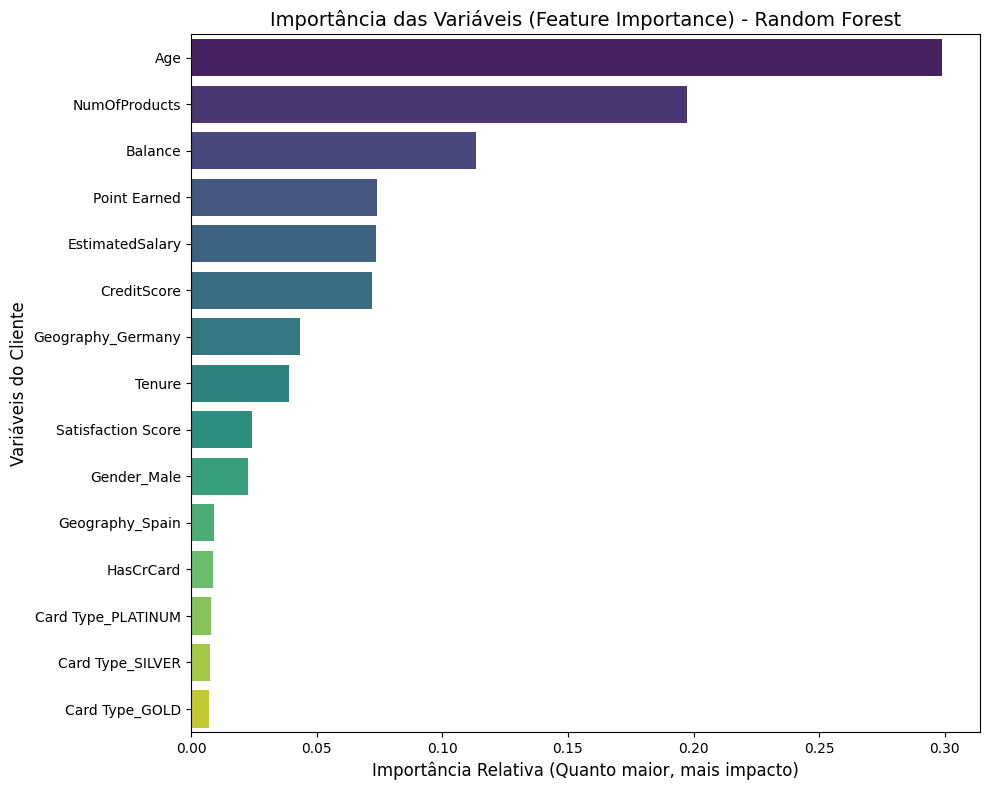

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extraindo o modelo real de dentro do Pipeline
# Lembra que demos o nome de "model" para a etapa do algoritmo no Pipeline?
rf_model = modelo_vencedor.named_steps["model"]

# 2. Pegando os valores de importância calculados pelo Random Forest
importancias = rf_model.feature_importances_

# 3. Pegando os nomes das colunas originais do seu DataFrame de treino
# (Substitua X_train pelo nome da sua variável com as features, se for diferente)
nomes_features = X_train.columns

# 4. Criando um DataFrame para facilitar a ordenação
df_importancias = pd.DataFrame({
    'Feature': nomes_features,
    'Importância': importancias
})

# 5. Ordenando da mais importante para a menos importante
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

# 6. Plotando o Gráfico de Barras Horizontal
plt.figure(figsize=(10, 8)) # Ajuste o tamanho conforme necessário

# O Seaborn facilita muito a criação de gráficos de barras bonitos
sns.barplot(
    x='Importância', 
    y='Feature', 
    data=df_importancias, 
    palette='viridis' # Uma paleta de cores agradável e profissional
)

# Adicionando títulos e rótulos
plt.title('Importância das Variáveis (Feature Importance) - Random Forest', fontsize=14)
plt.xlabel('Importância Relativa (Quanto maior, mais impacto)', fontsize=12)
plt.ylabel('Variáveis do Cliente', fontsize=12)

# Ajusta o layout para não cortar os nomes das variáveis
plt.tight_layout()

# Exibe o gráfico no seu Jupyter Notebook ou interface
plt.show()

___
**Trade-offs relevantes:**
- Falso Negativo (FN): churn que o modelo não detecta → perde oportunidade de retenção (custo alto de perda de cliente).
- Falso Positivo (FP): cliente que não sairia, mas recebe ação → custo de campanha/benefício (custo de retenção desnecessária)

**Persistência dos Modelos**

In [89]:
import joblib

# ==========================================
# ARTEFATO 1: SALVANDO O MODELO (.pkl)
# ==========================================
nome_arquivo_modelo = 'rf.pkl'
joblib.dump(modelo_vencedor, nome_arquivo_modelo)
print(f"✅ Modelo salvo com sucesso: {nome_arquivo_modelo}")


# ==========================================
# ARTEFATO 2: GERANDO O DATASET FINAL (.csv)
# ==========================================
# Supondo que 'df_model' é o seu dataframe completo lá do início
# e 'X' são todas as suas features antes da divisão de treino/teste.

# 1. Fazemos uma cópia do dataframe original para não bagunçar os dados iniciais
df_final = df_model.copy()

# 2. Criamos a coluna com a previsão (0 ou 1)
df_final['CHURN_PREDICT'] = modelo_vencedor.predict(X)

# 3. Criamos a coluna com a probabilidade
# predict_proba retorna duas colunas: [prob_classe_0, prob_classe_1]
# Pegamos apenas a coluna índice 1 ([:, 1]), que é a probabilidade de dar Churn
df_final['CHURN_PROB'] = modelo_vencedor.predict_proba(X)[:, 1]

# (Opcional) Podemos arredondar a probabilidade para 4 casas decimais para ficar mais limpo
df_final['CHURN_PROB'] = df_final['CHURN_PROB'].round(4)

# 4. Salvamos o resultado em um arquivo CSV
nome_arquivo_csv = 'customer-churn-predict.csv'
df_final.to_csv(nome_arquivo_csv, index=False)
print(f"✅ Dataset final salvo com sucesso: {nome_arquivo_csv}")

✅ Modelo salvo com sucesso: melhor_modelo_churn.pkl
✅ Dataset final salvo com sucesso: customer-churn-predict.csv


___
### **7. Conclusão executiva**

**O modelo resolve o gap identificado?**
- O modelo resolve o gap com f1-score de 6.1



___
**Onde ele falha?**
- Coletar mais dados para aumentar o recall e a precision do modelo.
- Definição de uma esteira MLOps para realizar o acompanhamento das métricas do modelo conforme retreinamos com novos dados.

___
**O que seria necessário para levar isso para produção?**
- Coletar mais dados para aumentar o recall e a precision do modelo.
- Definição de uma esteira MLOps para realizar o acompanhamento das métricas do modelo conforme retreinamos com novos dados.

___
**Há potencial de geração de valor (ex.: redução de custo, aumento de eficiência, mitigação de risco)?**

**Caso positivo, explore os resultados sob uma ótica qualitativa ou estimada, considerando impacto financeiro, ROI ou payback.**
- O valor está em não perder os clientes que o banco já conseguiu, visto que é mais caro para um banco conseguir um novo cliente do que manter o cliente atual.
- Cross-sell: oferecer novos produtos e direcionar campanhas de marketing para clientes que estão com intenção de sair do banco



___
### 8. Riscos e limitações

**Riscos técnicos**
- A variável ``Complain`` é muito relacionada com o Churn, e, por suspeita de Data Leakege, tivemos que removê-la.
- ``IsActiveMember`` é uma variável que não contém descrição clara, então pode ser um risco para o modelo.

___
**Riscos de viés**
- Não sabemos se os gêneros do dataset são representativos. Existe um risco se existirem mais dados do gênero masculino do que feminino.
- Modelo treinado com 3 países, cuidado com a generalização do modelo para outros países com características distintas.
- Todos os clientes que deram churn reclamaram. Será que é necessário abrir uma reclamação interna para o cliente sair do banco?

___
**Riscos regulatórios ou operacionais**
- A explicabilidade de alguns modelos é baixa, o que pode dificultar a auditabilidade e também a contratação dessa tecnologia por licitação.
- Risco operacional de oferecer campanhas de desconto para clientes que não tinham intenção de sair do banco.
- Se atentar à LGPD ao utilizar os dados.
- Risco de discriminação (taxa de juros) para algum gênero ou nacionalidade específica.

___
### **9. Apresentação do PoC**

**Demonstração da solução concebida em funcionamento, preferencialmente como:**

- Uma aplicação completa (ex.: Streamlit), e/ou

- Um notebook ou programa em Python executável via linha de comando.